In [43]:
import rasterio
from rasterio.plot import show
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


BASE_PATH = 'C:\Adarsh work\personal\IIITS\Remote Sensing\\'
DEBUG = True
def debug(args):
    if DEBUG:
        print(args)

Shape of the image is: (1, 1055, 834)
The number of pixels in the image: 879870


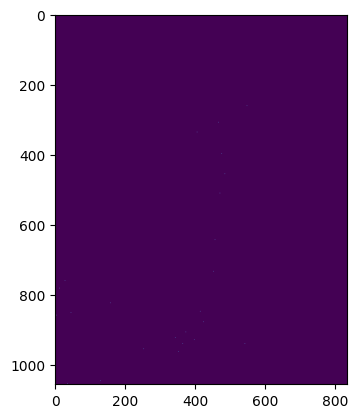

<Axes: >

In [44]:
image_path = BASE_PATH + 'Data\TrnRstr1.tif'

dataset = rasterio.open(image_path)
bands = dataset.read()

# Convert the image array to a writable array
image_array = bands.copy()
# Create an array with the same shape as the image for storing labels
label_array = np.zeros_like(bands[0])

debug(f'Shape of the image is: {bands.shape}')
debug(f'The number of pixels in the image: {bands.shape[1]*bands.shape[2]}')
show(bands)

In [39]:
csv_file_path = BASE_PATH + 'Data\\raw_data.csv'

df = pd.read_csv(csv_file_path)

# Iterate over rows in the CSV file
for index, row in df.iterrows():
    x_coord, y_coord, raster_value, label = row['X Coordinate'], row['Y Coordinate'], row['RASTERVALU'], row['Label']

    # Place RASTERVALU and label values in the image array at the corresponding pixel position
    image_array[0, int(x_coord), int(y_coord)] = raster_value
    label_array[0, int(x_coord), int(y_coord)] = label

# Optionally, you can save the modified image array as a new TIFF file
new_label_image_path = BASE_PATH + 'Data\labels.tif'
with rasterio.open(new_label_image_path, 'w', driver='GTiff', count=bands.shape[0], width=bands.shape[2], height=bands.shape[1], crs=dataset.crs, transform=dataset.transform, dtype='float32') as dst:
    dst.write(label_array, indexes=list(range(1, bands.shape[0] + 1)))

print(f"Data from CSV file placed in the image array. Modified image saved at: {new_label_image_path}")


IndexError: index 523970 is out of bounds for axis 1 with size 1055

In [42]:
image_array.shape

(1, 1055, 834)